In [118]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import rand_score, silhouette_score, silhouette_samples
warnings.filterwarnings("ignore")

In [119]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [120]:
data = pd.read_csv("khan_train.csv")

In [127]:
data

,EWS.T1,EWS.T2,EWS.T3,EWS.T4,EWS.T6,EWS.T7,EWS.T9,EWS.T11,EWS.T12,EWS.T13,...,RMS.T4,RMS.T2,RMS.T6,RMS.T7,RMS.T8,RMS.T5,RMS.T9,RMS.T3,RMS.T10,RMS.T11
0,3.2025,1.6547,3.2779,1.0060,2.7098,2.0588,1.8483,2.7140,2.3555,1.9291,...,3.4636,2.0816,3.1013,2.0272,2.2313,1.8594,2.5447,1.2705,1.2766,2.0298
1,0.0681,0.0710,0.1160,0.1906,0.2367,0.0823,0.1234,0.1805,0.0792,0.2520,...,1.2855,0.9137,0.3910,0.5502,1.9247,0.5240,0.5169,0.4657,0.7770,0.7067
2,1.0460,1.0409,0.8926,0.4302,0.3693,0.9021,0.9983,0.4964,0.7614,0.5745,...,0.3355,0.5806,0.3937,0.3688,0.2943,0.6808,1.2190,0.9344,0.2212,1.0439
3,0.1243,0.0520,0.1014,0.1035,0.2190,0.1288,0.2203,0.2509,0.1868,0.1356,...,0.0893,0.0673,0.2905,0.3627,0.1762,0.3013,0.5151,0.0680,0.1432,0.1016
4,0.4941,0.2045,0.2818,0.2984,0.3711,0.3961,0.3766,0.4754,0.4167,0.3363,...,0.3219,0.6856,0.1113,0.6133,0.3855,0.4011,0.3405,0.3930,0.1669,0.2147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,0.2756,0.2688,0.3221,0.8123,0.4084,0.3279,0.3467,0.7362,0.1688,0.3516,...,0.5637,0.1765,0.0992,0.2849,0.2658,0.3058,0.2857,0.1575,0.1139,0.1197
2304,0.1521,0.1932,0.2156,0.2758,0.6412,0.3388,0.3564,0.8579,0.7608,0.3112,...,0.1767,0.1055,0.1863,0.1810,0.2081,0.3701,0.7104,0.0756,0.2140,0.1099
2305,0.3175,0.4140,0.3227,0.3016,0.3552,0.1654,0.3500,0.2067,0.3298,0.2654,...,0.3586,0.4145,0.0430,0.1075,0.4030,0.9735,0.2814,0.1946,0.3962,0.3070
2306,0.7240,1.2708,1.2142,0.7235,1.3928,0.8991,0.4412,0.7537,0.4842,0.6044,...,0.4973,1.4872,0.6427,0.6954,0.8022,0.5892,0.7881,1.0466,0.9818,0.2622


In [105]:
print(list(data.columns))

['EWS.T1', 'EWS.T2', 'EWS.T3', 'EWS.T4', 'EWS.T6', 'EWS.T7', 'EWS.T9', 'EWS.T11', 'EWS.T12', 'EWS.T13', 'EWS.T14', 'EWS.T15', 'EWS.T19', 'EWS.C8', 'EWS.C3', 'EWS.C2', 'EWS.C4', 'EWS.C6', 'EWS.C9', 'EWS.C7', 'EWS.C1', 'EWS.C11', 'EWS.C10', 'BL.C5', 'BL.C6', 'BL.C7', 'BL.C8', 'BL.C1', 'BL.C2', 'BL.C3', 'BL.C4', 'NB.C1', 'NB.C2', 'NB.C3', 'NB.C6', 'NB.C12', 'NB.C7', 'NB.C4', 'NB.C5', 'NB.C10', 'NB.C11', 'NB.C9', 'NB.C8', 'RMS.C4', 'RMS.C3', 'RMS.C9', 'RMS.C2', 'RMS.C5', 'RMS.C6', 'RMS.C7', 'RMS.C8', 'RMS.C10', 'RMS.C11', 'RMS.T1', 'RMS.T4', 'RMS.T2', 'RMS.T6', 'RMS.T7', 'RMS.T8', 'RMS.T5', 'RMS.T9', 'RMS.T3', 'RMS.T10', 'RMS.T11']


In [126]:
data.drop("Unnamed: 0", axis='columns', inplace=True)

In [109]:
silhoutte_scores = []

### Q1

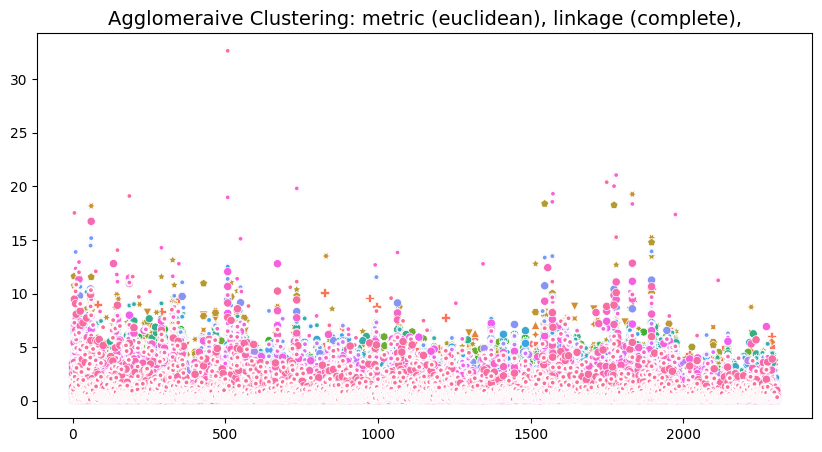

In [100]:
clust = AgglomerativeClustering(
    n_clusters=None,               # Needs to be None if distance_threshold is used
    metric = 'euclidean',
    linkage = 'complete',
    distance_threshold = 0.125     # Select based on distance between points
)

y_pred = clust.fit_predict(data)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title("Agglomeraive Clustering: metric ({}), linkage ({}),".format(clust.metric, clust.linkage), size=14)
sns.scatterplot(data=data, ax=ax, legend=False)
plt.show()

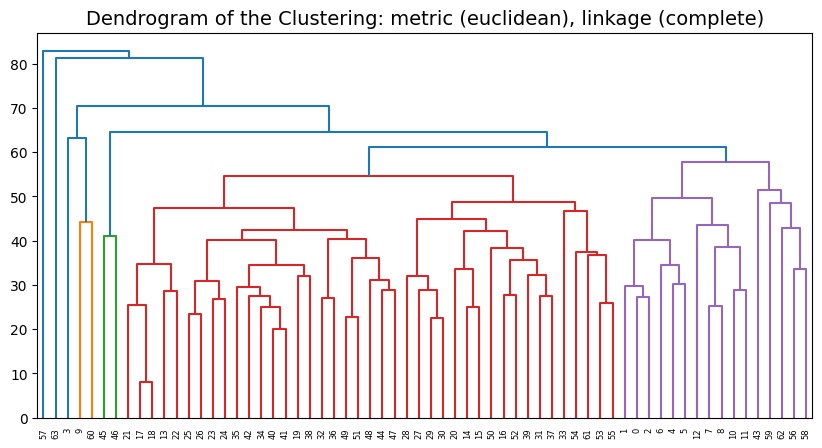

In [73]:
Z = linkage(
    y = data.T,
    method='complete',
    metric='euclidean'
)

fig, ax = plt.subplots(1,1,figsize=(10,5))
R = dendrogram(Z,  ax=ax);
ax.set_title("Dendrogram of the Clustering: metric ({}), linkage ({})".format(clust.metric, clust.linkage), size=14)
plt.show()

## Question 2

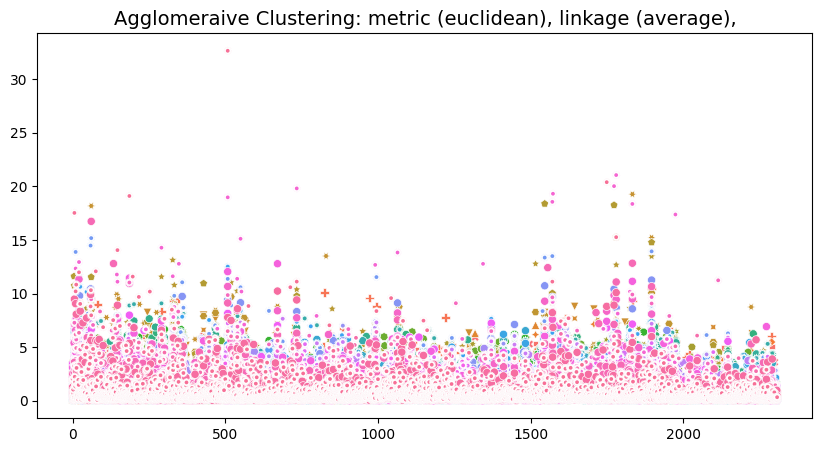

In [74]:
clust = AgglomerativeClustering(
    n_clusters=None,               # Needs to be None if distance_threshold is used
    metric = 'euclidean',
    linkage = 'average',
    distance_threshold = 0.125     # Select based on distance between points
)

y_pred = clust.fit_predict(data)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title("Agglomeraive Clustering: metric ({}), linkage ({}),".format(clust.metric, clust.linkage), size=14)
sns.scatterplot(data=data, ax=ax, legend=False)
plt.show()

silhoutte_score.append(silhoutte_score(data, y_pred))
print("Silhoutte_Score: {:.4f}".format(silhouette_score(data, y_pred)))

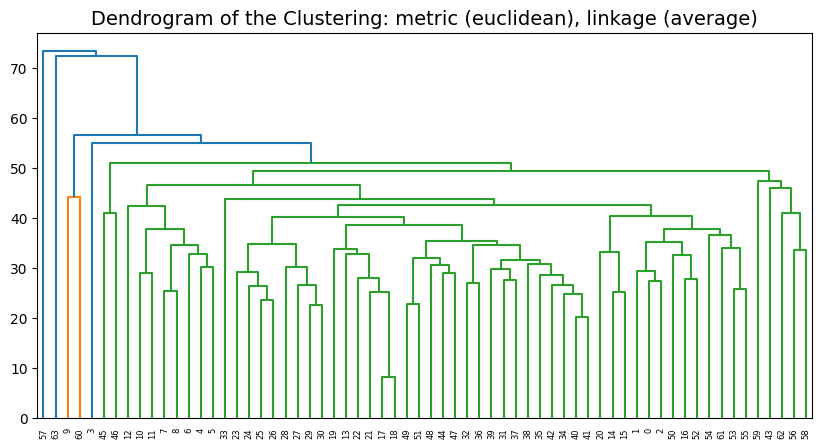

In [75]:
Z = linkage(
    y = data.T,
    method='average',
    metric='euclidean'
)

fig, ax = plt.subplots(1,1,figsize=(10,5))
R = dendrogram(Z,  ax=ax);
ax.set_title("Dendrogram of the Clustering: metric ({}), linkage ({})".format(clust.metric, clust.linkage), size=14)
plt.show()

## Question 3

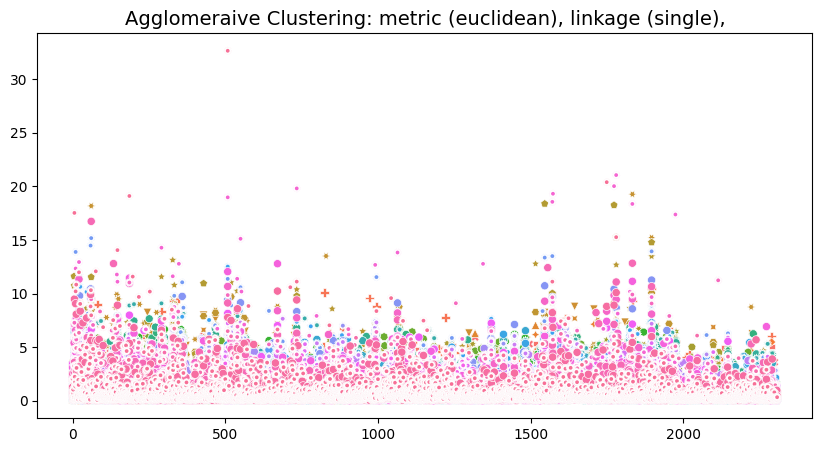

In [76]:
clust = AgglomerativeClustering(
    n_clusters=None,               # Needs to be None if distance_threshold is used
    metric = 'euclidean',
    linkage = 'single',
    distance_threshold = 0.125     # Select based on distance between points
)

y_pred = clust.fit_predict(data)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title("Agglomeraive Clustering: metric ({}), linkage ({}),".format(clust.metric, clust.linkage), size=14)
sns.scatterplot(data=data, ax=ax, legend=False)
plt.show()

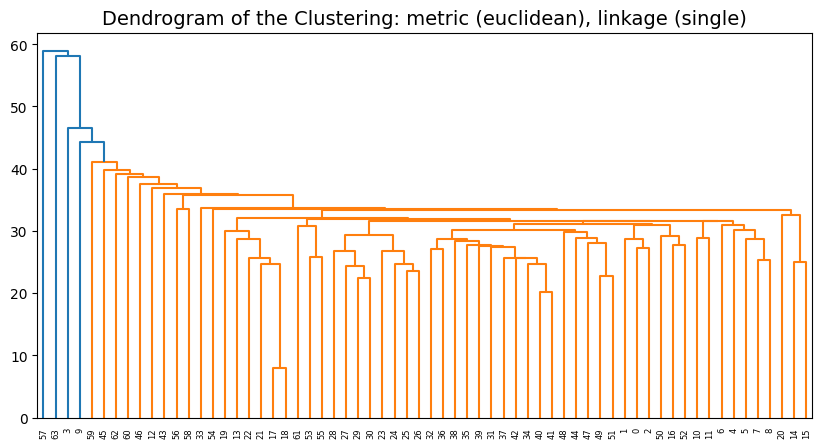

In [78]:
Z = linkage(
    y = data.T,
    method='single',
    metric='euclidean'
)

fig, ax = plt.subplots(1,1,figsize=(10,5))
R = dendrogram(Z,  ax=ax);
ax.set_title("Dendrogram of the Clustering: metric ({}), linkage ({})".format(clust.metric, clust.linkage), size=14)
plt.show()

## Question 4

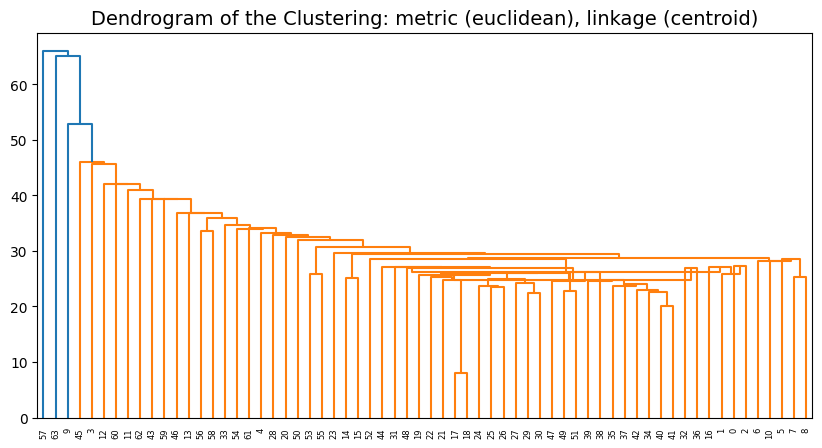

In [80]:
Z = linkage(
    y = data.T,
    method='centroid',
    metric='euclidean'
)

fig, ax = plt.subplots(1,1,figsize=(10,5))
R = dendrogram(Z,  ax=ax);
ax.set_title("Dendrogram of the Clustering: metric ({}), linkage ({})".format(clust.metric, "centroid"), size=14)
plt.show()

## Question 5

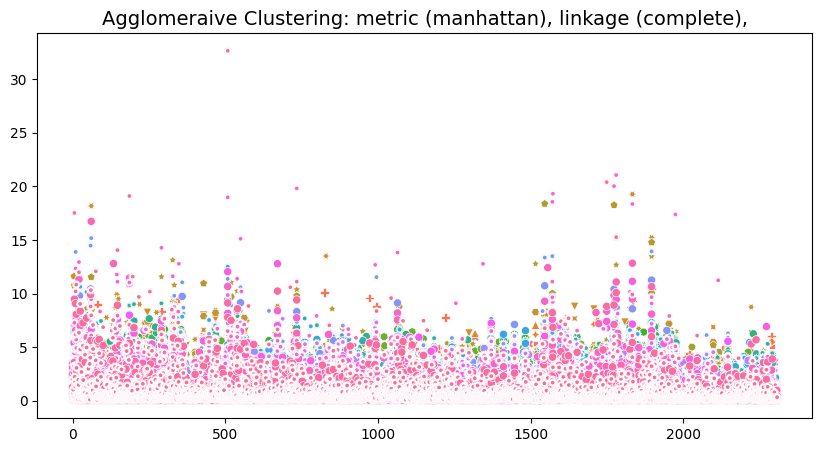

In [81]:
clust = AgglomerativeClustering(
    n_clusters=None,               # Needs to be None if distance_threshold is used
    metric = 'manhattan',
    linkage = 'complete',
    distance_threshold = 0.125     # Select based on distance between points
)

y_pred = clust.fit_predict(data)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title("Agglomeraive Clustering: metric ({}), linkage ({}),".format(clust.metric, clust.linkage), size=14)
sns.scatterplot(data=data, ax=ax, legend=False)
plt.show()

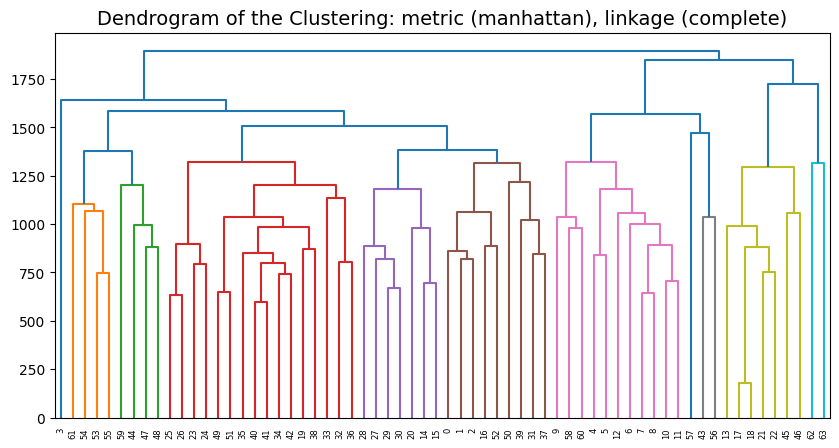

In [84]:
Z = linkage(
    y = data.T,
    method='complete',
    metric='cityblock'
)

fig, ax = plt.subplots(1,1,figsize=(10,5))
R = dendrogram(Z,  ax=ax);
ax.set_title("Dendrogram of the Clustering: metric ({}), linkage ({})".format(clust.metric, clust.linkage), size=14)
plt.show()

## Question 6

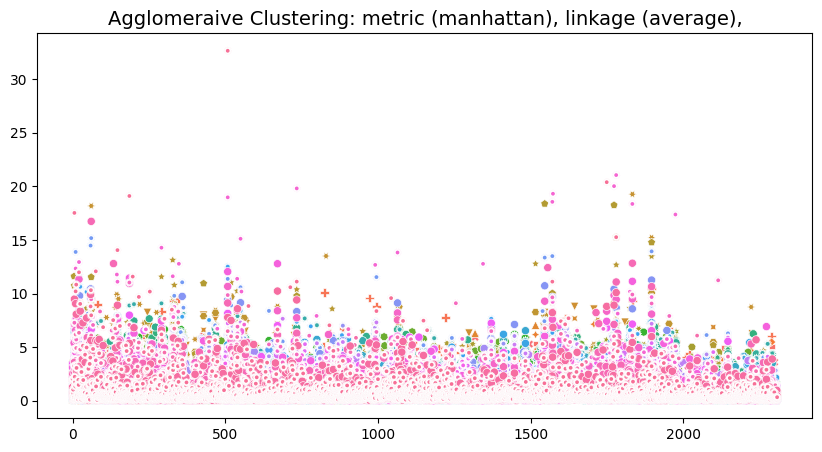

In [85]:
clust = AgglomerativeClustering(
    n_clusters=None,               # Needs to be None if distance_threshold is used
    metric = 'manhattan',
    linkage = 'average',
    distance_threshold = 0.125     # Select based on distance between points
)

y_pred = clust.fit_predict(data)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title("Agglomeraive Clustering: metric ({}), linkage ({}),".format(clust.metric, clust.linkage), size=14)
sns.scatterplot(data=data, ax=ax, legend=False)
plt.show()

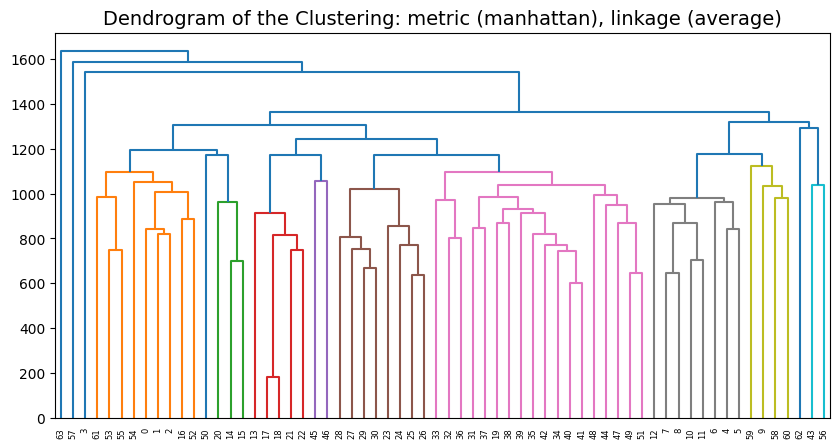

In [86]:
Z = linkage(
    y = data.T,
    method='average',
    metric='cityblock'
)

fig, ax = plt.subplots(1,1,figsize=(10,5))
R = dendrogram(Z,  ax=ax);
ax.set_title("Dendrogram of the Clustering: metric ({}), linkage ({})".format(clust.metric, clust.linkage), size=14)
plt.show()

## Question 7

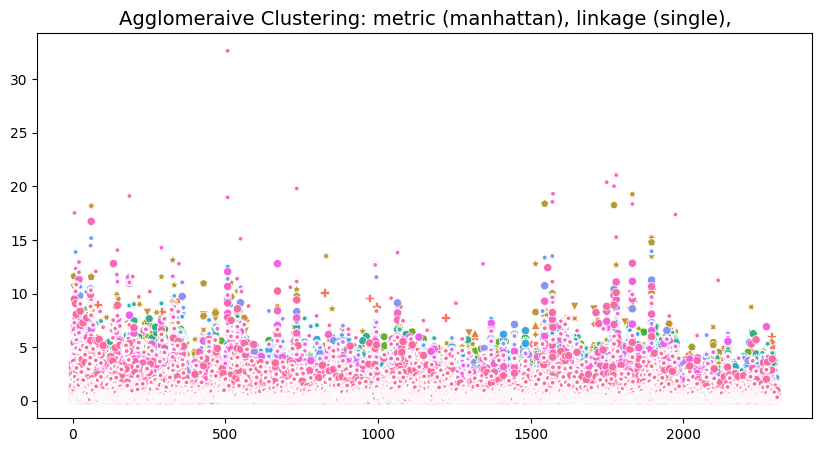

In [87]:
clust = AgglomerativeClustering(
    n_clusters=None,               # Needs to be None if distance_threshold is used
    metric = 'manhattan',
    linkage = 'single',
    distance_threshold = 0.125     # Select based on distance between points
)

y_pred = clust.fit_predict(data)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title("Agglomeraive Clustering: metric ({}), linkage ({}),".format(clust.metric, clust.linkage), size=14)
sns.scatterplot(data=data, ax=ax, legend=False)
plt.show()

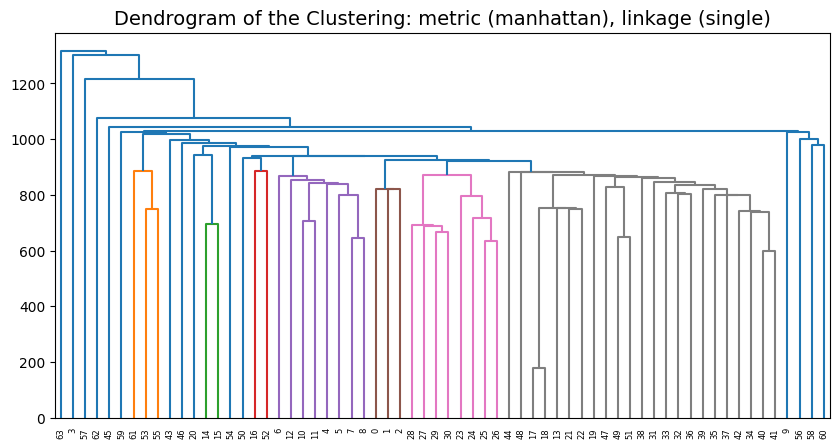

In [89]:
Z = linkage(
    y = data.T,
    method='single',
    metric='cityblock'
)

fig, ax = plt.subplots(1,1,figsize=(10,5))
R = dendrogram(Z,  ax=ax);
ax.set_title("Dendrogram of the Clustering: metric ({}), linkage ({})".format(clust.metric, clust.linkage), size=14)
plt.show()

## Analysis

In [112]:
metrics = ['euclidean', 'cityblock']
linkages = ['complete', 'average', 'single']

silhouette_scores = []
for i in range(len(metrics)):
    for j in range(len(linkages)):
        range_n_clusters = [2,3,4,5,6,7,8,9,10,11]
        silhouette_values = []
        for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
            clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric = metrics[i], linkage = linkages[j])
            y_predict = clusterer.fit_predict(data)
            cluster_labels = clusterer.labels_
            silhouette_avg = silhouette_score(data, cluster_labels)
            silhouette_values.append(silhouette_avg)
        print(metrics[i])
        print(linkages[j])
        print(silhouette_values)
        
        silhouette_scores.append(max(silhouette_values))

print(silhouette_scores)

euclidean
complete
[0.7268096668403311, 0.7237040448457818, 0.713326279682915, 0.6889461153282591, 0.6888421820471727, 0.5472552558067862, 0.5467706537861374, 0.5391808533011109, 0.5393655992079528, 0.5382810217731794]
euclidean
average
[0.7586727936667645, 0.7152262905441782, 0.7030011479256036, 0.7111014665830188, 0.6842168344285029, 0.6540690270355242, 0.6538882354370513, 0.6535276763616908, 0.6532528046871623, 0.6300438054879924]
euclidean
single
[0.8136437577219291, 0.7318741696151321, 0.7291993912202837, 0.7288339046803463, 0.7248561221963141, 0.6937222919043496, 0.636065680396066, 0.6355942577461503, 0.6335711315421546, 0.6373325746648303]
cityblock
complete
[0.7368120690742184, 0.7377799216271882, 0.5842629689091385, 0.5794199902595564, 0.5814892310099088, 0.5817704751138169, 0.5712331969324295, 0.5573489877857244, 0.5575092727920138, 0.22276291197512488]
cityblock
average
[0.7371810276428865, 0.7381309185193126, 0.7132699763952893, 0.710210456261228, 0.6196835422597539, 0.6205

Text(0.5, 1.0, 'Maximum silhouetter scores in each method')

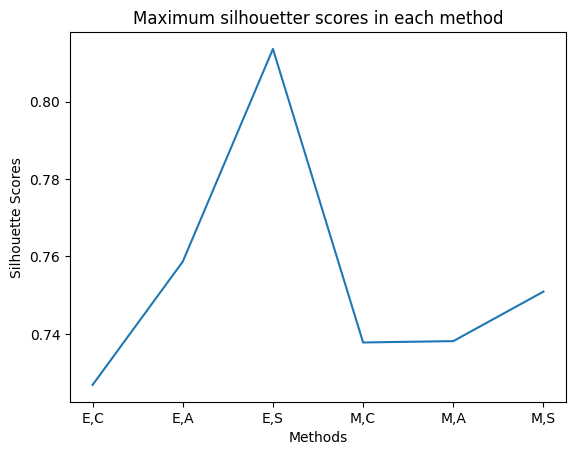

In [117]:
X = ["E,C", "E,A", "E,S", "M,C", "M,A", "M,S"]
plt.plot(X, silhouette_scores)
plt.xlabel("Methods")
plt.ylabel("Silhouette Scores")
plt.title("Maximum silhouetter scores in each method")